In [1]:
import astropy
from astropy.io import fits

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import axes

In [3]:
import numpy as np

In [4]:
import scipy
from scipy import signal

In [5]:
from math import sqrt

In [6]:
fitspec = fits.open('spec-1373-53063-0583.fits')

In [7]:
data =  fitspec[1].data

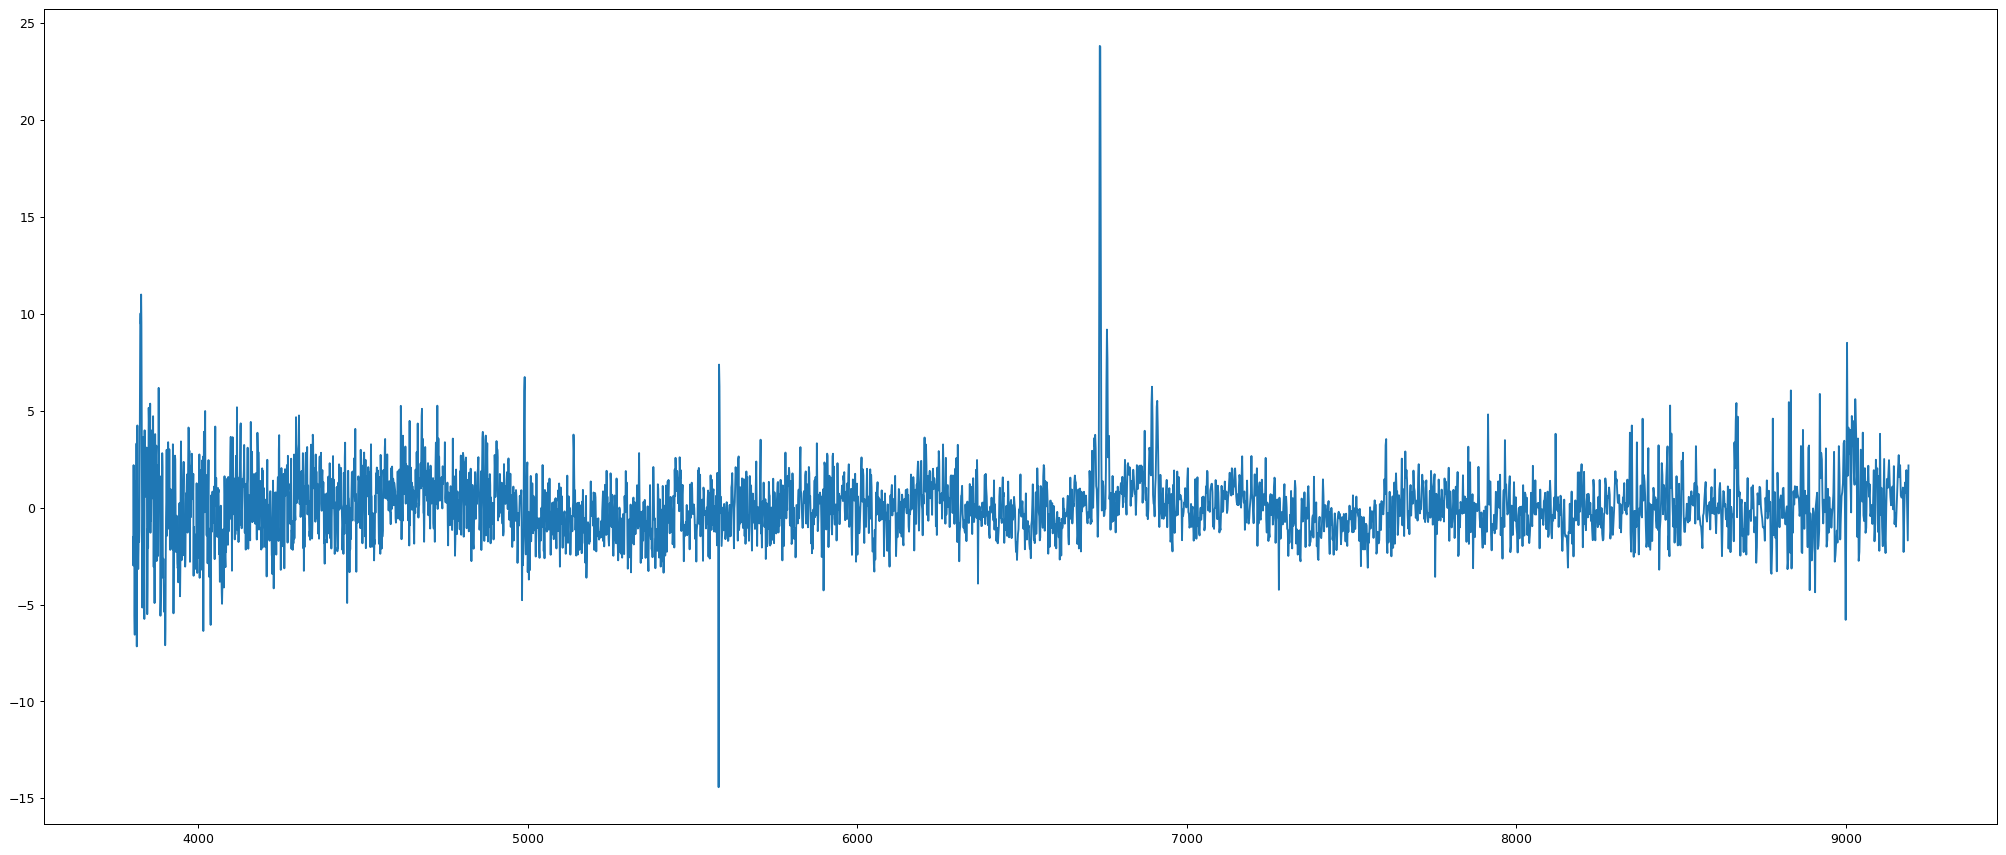

In [8]:
x = data['loglam']
y = data['flux'] - data['model']
x = 10**x
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y)

In [9]:
y_med = scipy.signal.medfilt(y, kernel_size=41) #окно должно быть нечётным

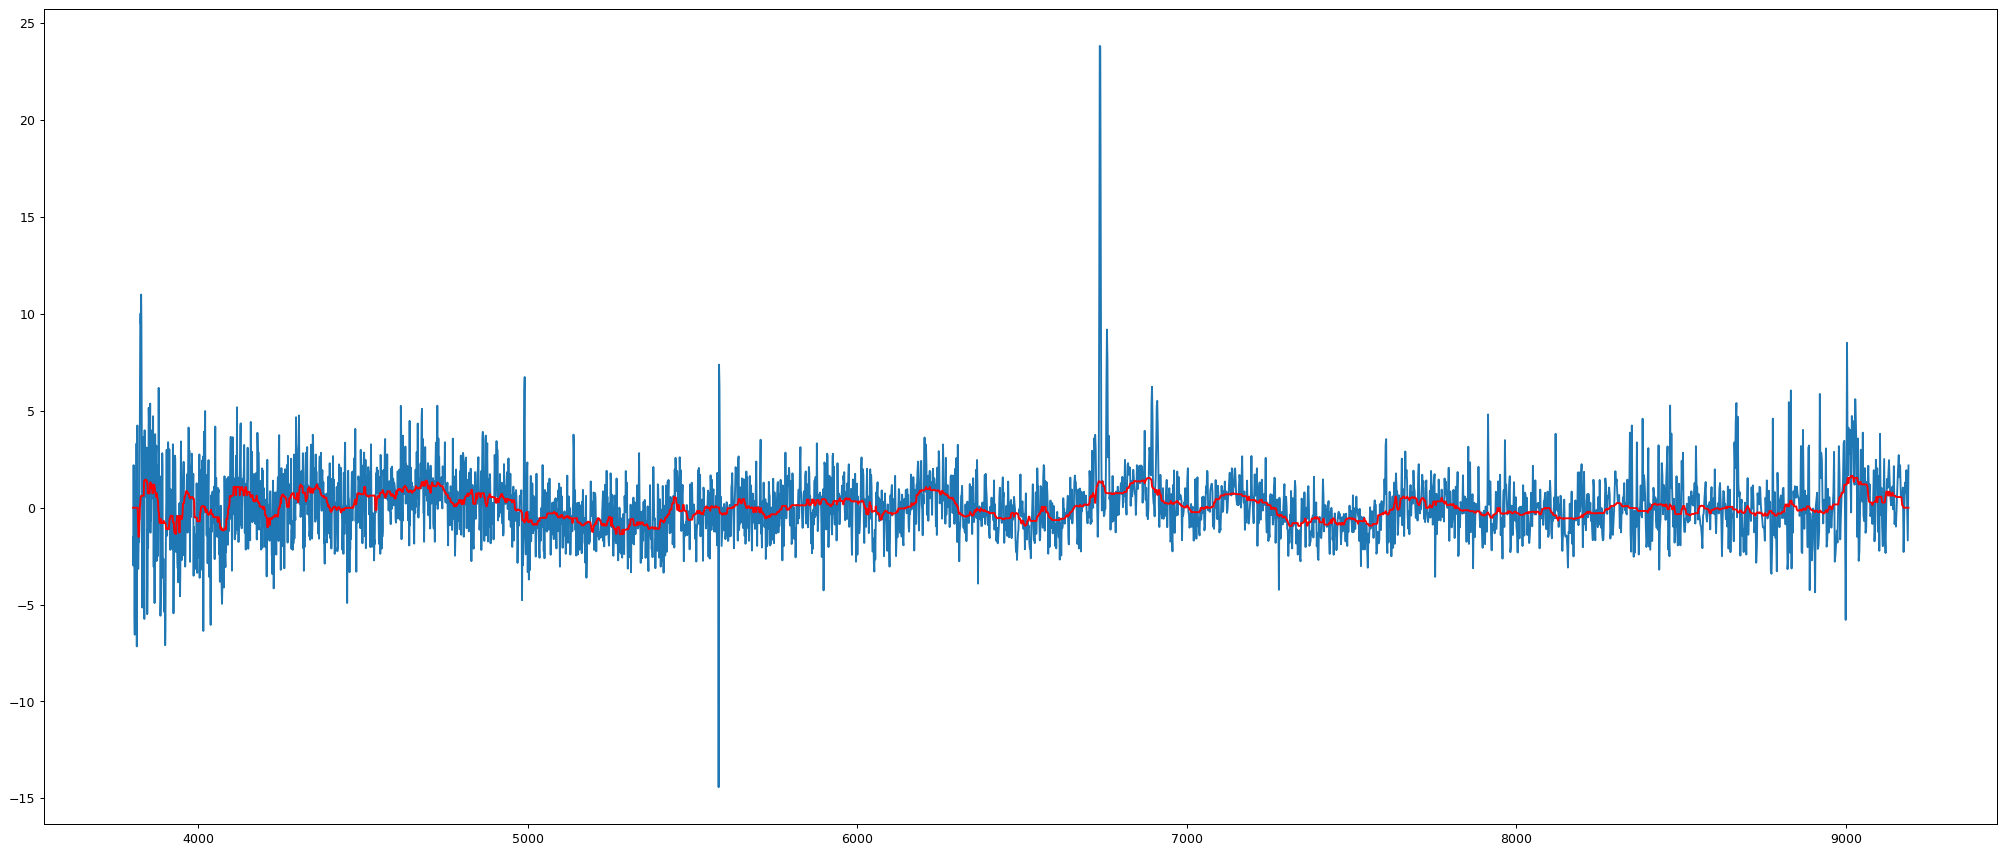

In [10]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y)
plt.plot(x, y_med, "r")
plt.show()

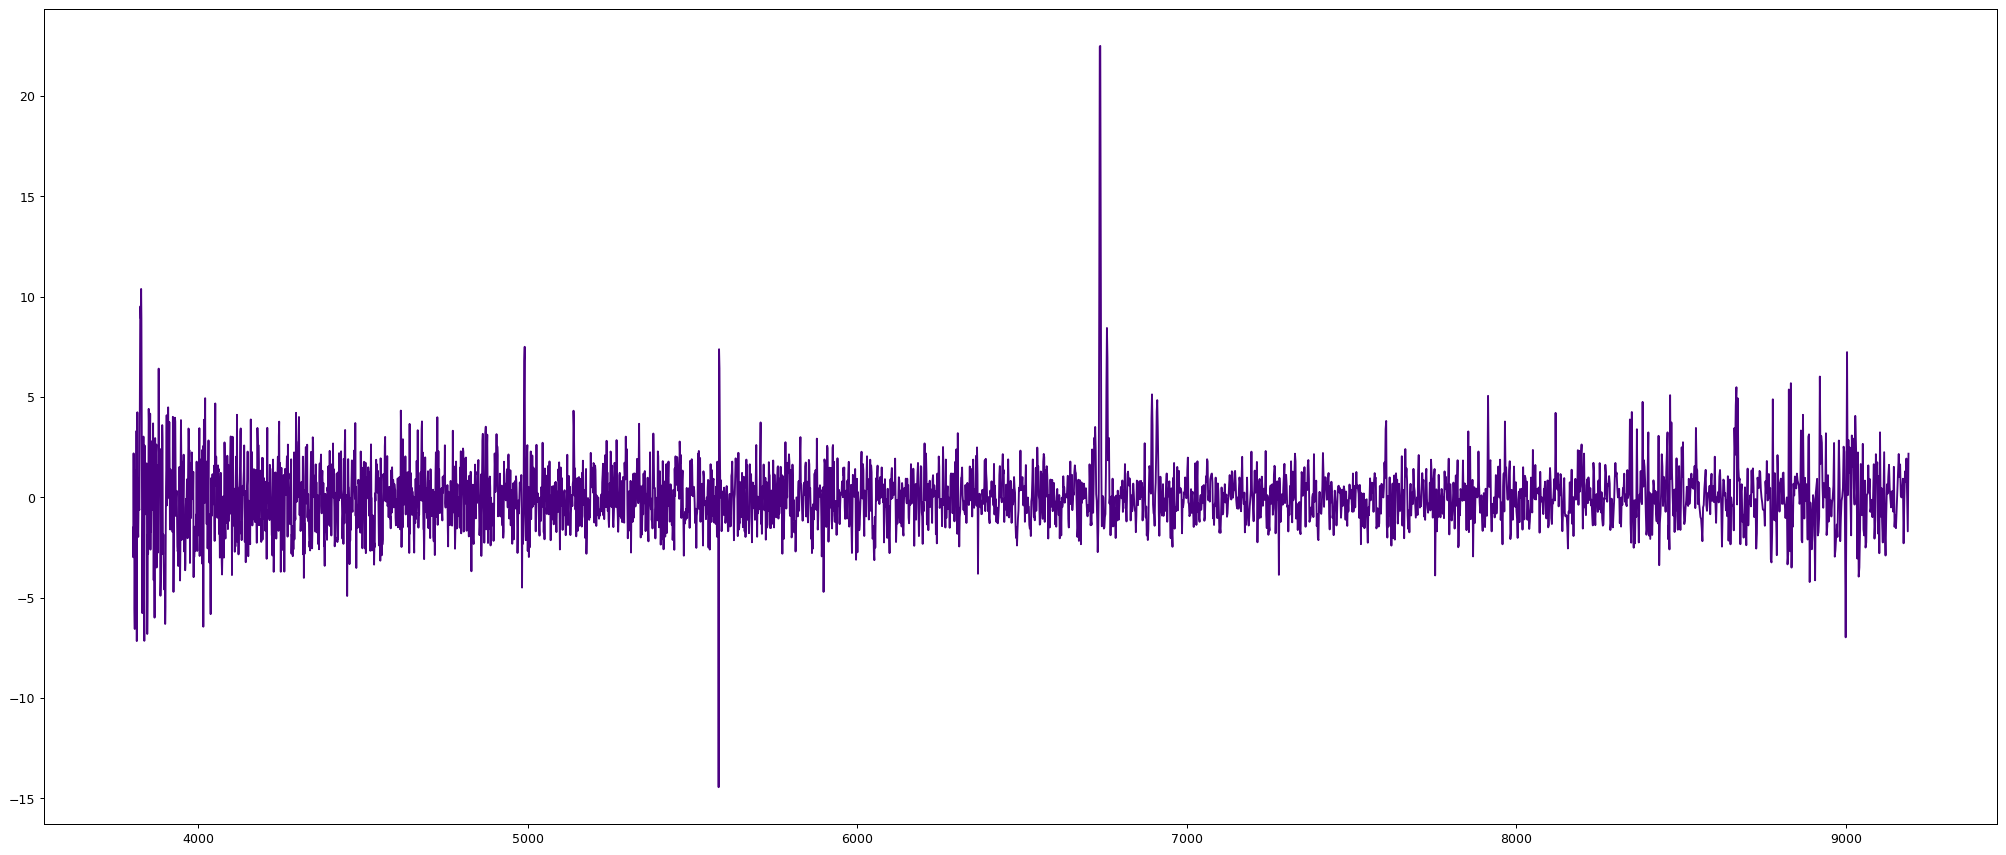

In [11]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-y_med, color = 'indigo') #спектр с вычтенным медианным

In [29]:
data['ivar']

array([0.12693821, 0.12381468, 0.10906556, ..., 0.37793764, 0.3753734 ,
       0.3579889 ], dtype=float32)

In [30]:
ivars = data['ivar']
varrs = (1/ivars) #без корня?

<ipython-input-30-ea5bcbb108b5>:2: RuntimeWarning: divide by zero encountered in true_divide
  varrs = (1/ivars) #без корня?


In [31]:
varrs

array([7.8778486, 8.076587 , 9.1687975, ..., 2.645939 , 2.664014 ,
       2.7933826], dtype=float32)

In [32]:
sigmas = 3*(sqrt(varrs))

TypeError: only size-1 arrays can be converted to Python scalars

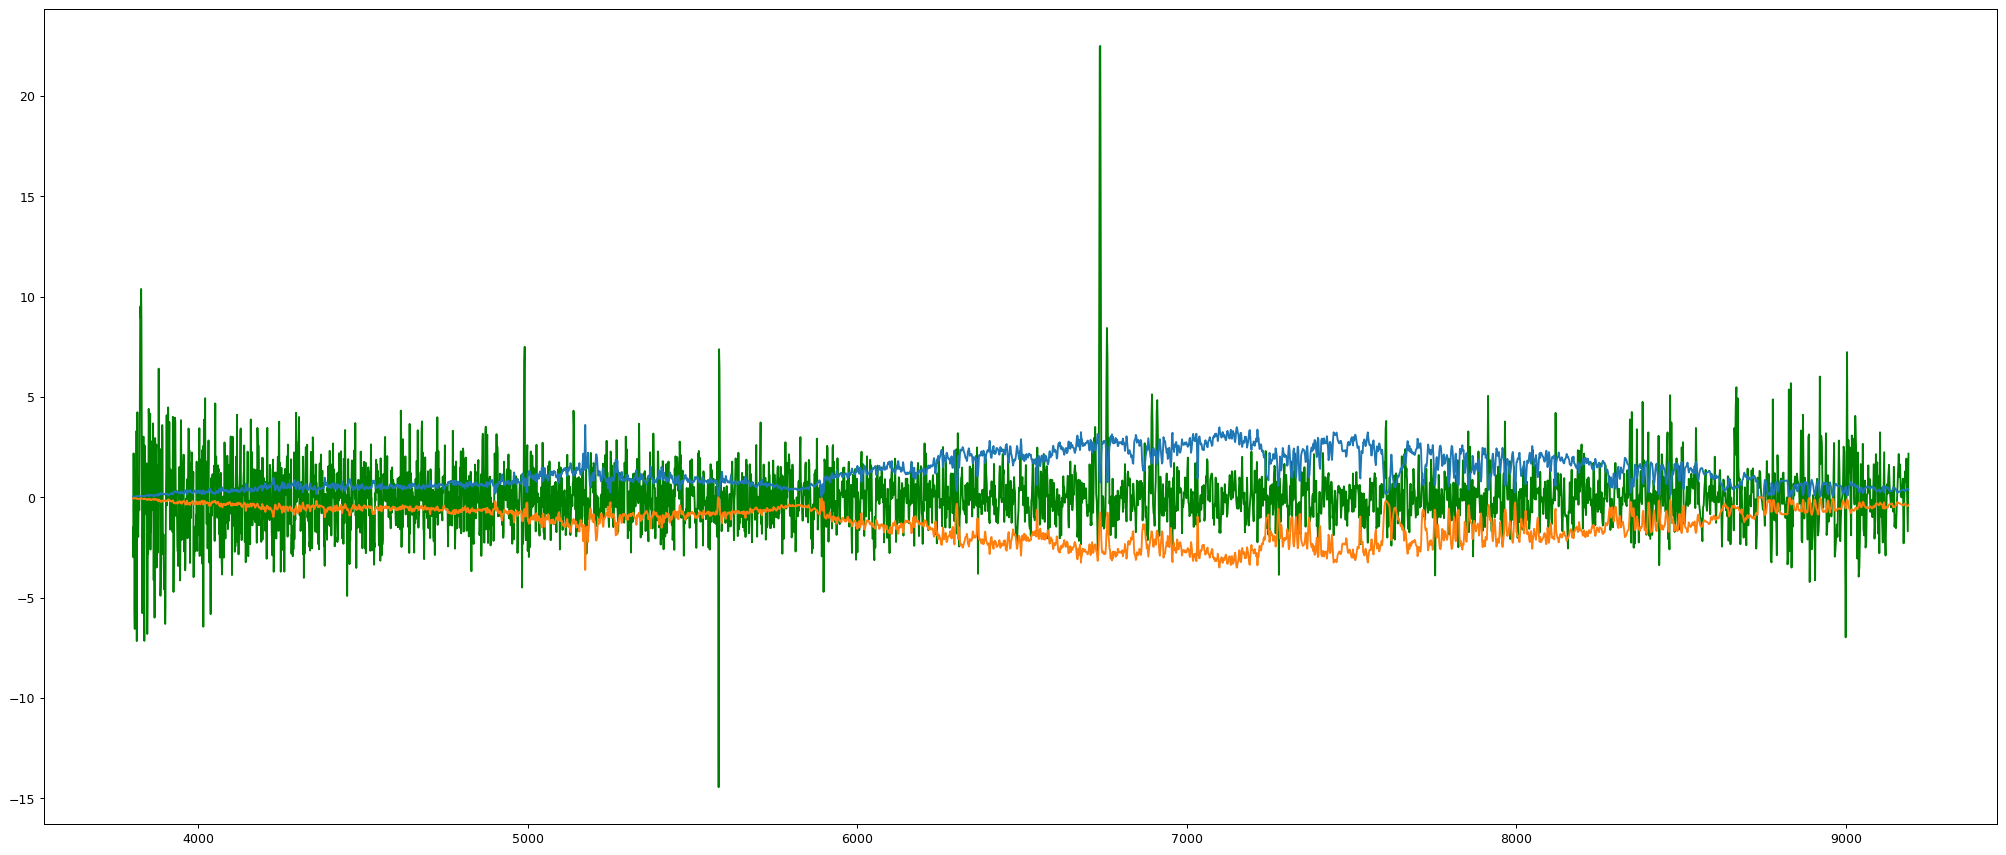

In [33]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-y_med, color = 'green') #сглаженный спектр
plt.plot(x, sigmas) #сигмы
plt.plot(x, -sigmas)

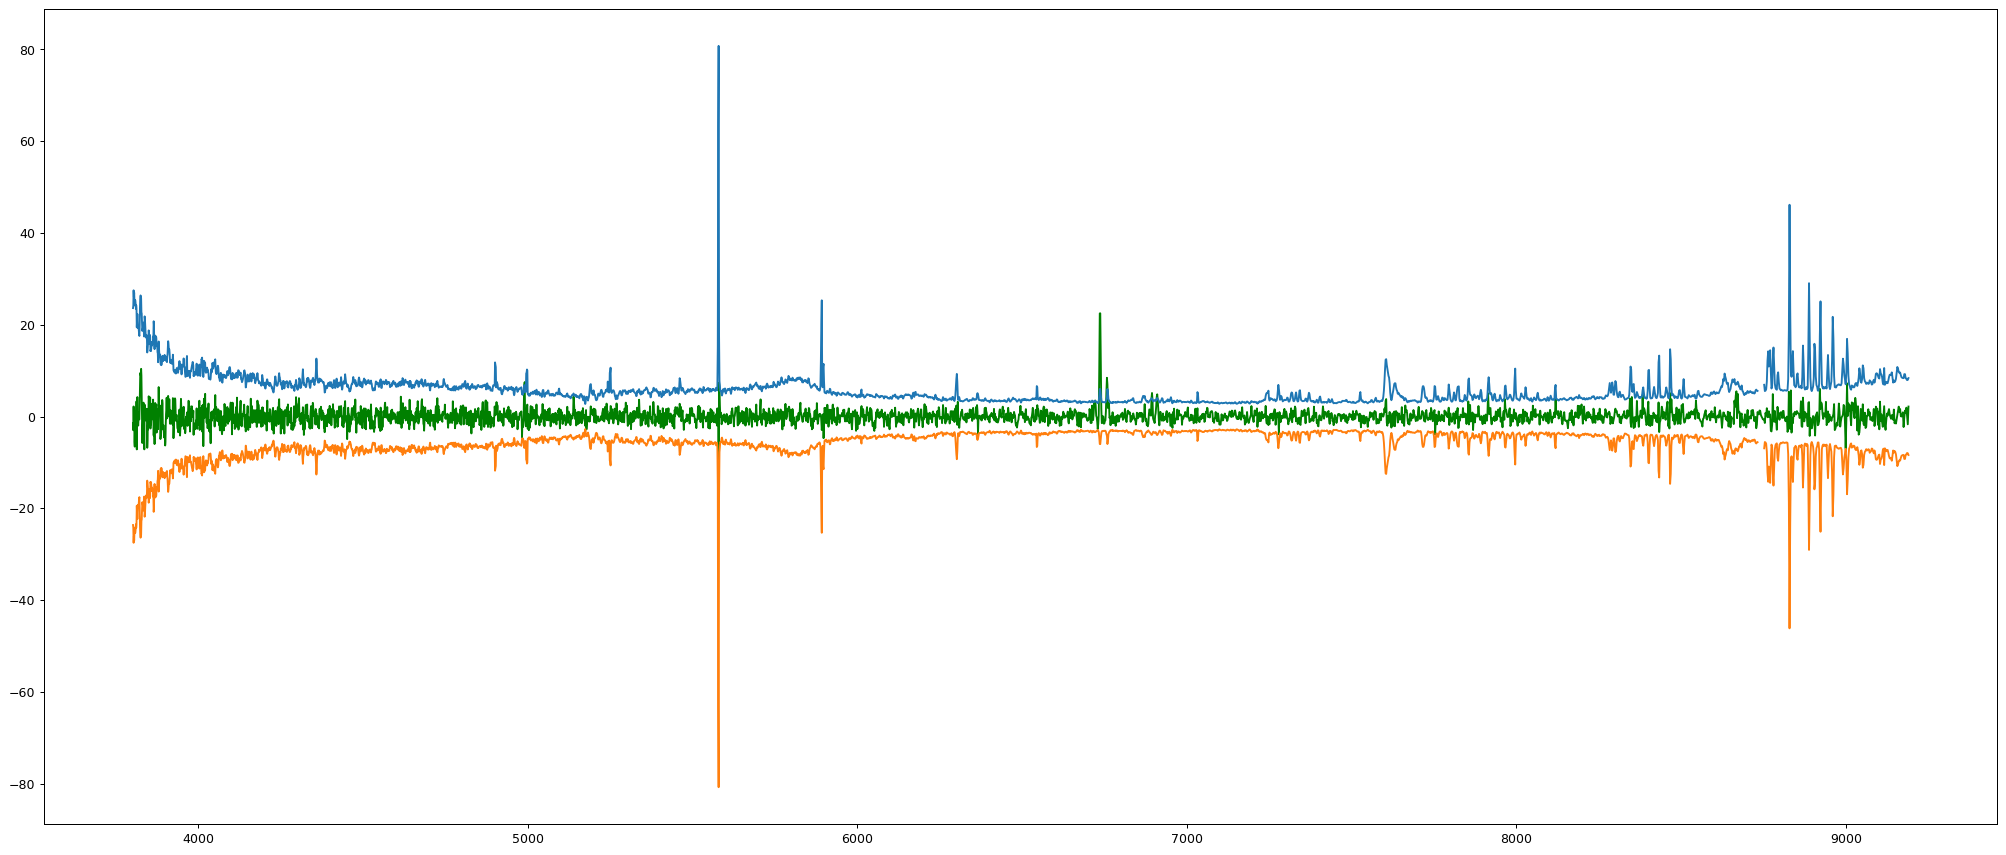

In [34]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-y_med, color = 'green') #сглаженный спектр
plt.plot(x, varrs) #дисперсия
plt.plot(x, -varrs)